# Blood fat
- 나이, 몸무게를 입력하면 
- blood fat을 예측하는 Lineaer Regression

In [2]:
import numpy as np
raw_data = np.genfromtxt('x09.txt', skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

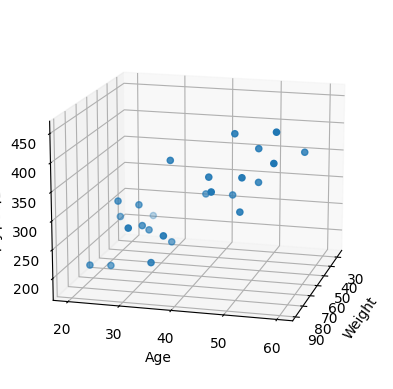

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')

ax.view_init(15, 15)
plt.show()

# 모델을 대표하는 직선을 그리는 것.
### y = xW + b
- 여기서 y는 blood fat
- x는 age, weight(몸무게)
### w와 b를 구하는 것이 목표

In [19]:
x_data = np.array(raw_data[:, 2:4], dtype=np.float32)
y_data = np.array(raw_data[:, 4], dtype=np.float32)

x_data.shape, y_data.shape

((25, 2), (25,))

##### y_data 의 shape 변경
- x 크기 : (25, 2)
- y 크기 : (25, )
- W 크기 : (2, 1)
- b 크기 : (25, 1)
##### xW는 (25, 1)이 된다. 
#### 따라서 y 도 (25, 1)이 되어야 한다.


In [20]:
y_data = y_data.reshape((25, 1))

In [21]:
y_data.shape

(25, 1)

### keras 이용한 Linear Regression 모델

In [11]:
import tensorflow as tf
print(tf.__version__)

2.13.0


##### loss function
- 손실함수: 정답과 얼마나 멀리 떨어져있는지 수치화한 함수. 작을수록 좋은 것

##### optimizer
- loss함수를 최소화하는 가중치를 찾기 위한 과정

#### 1) 모델선언
- 입력이 2개, 출력은 1개인 layer

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,)) # 입력이 2개, 출력은 1개인 layer
])

model.compile(optimizer='rmsprop', loss='mse')

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 2) 모델 학습

In [18]:
x_data.shape, y_data.shape

((25, 2), (25, 1))

In [24]:
%%time
history = model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 5ms/step - loss: 2401.2725
Epoch 2/5000
1/1 [==============================] - 0s 4ms/step - loss: 2400.6943
Epoch 3/5000
1/1 [==============================] - 0s 3ms/step - loss: 2400.1165
Epoch 4/5000
1/1 [==============================] - 0s 3ms/step - loss: 2399.5398
Epoch 5/5000
1/1 [==============================] - 0s 4ms/step - loss: 2398.9631
Epoch 6/5000
1/1 [==============================] - 0s 4ms/step - loss: 2398.3860
Epoch 7/5000
1/1 [==============================] - 0s 4ms/step - loss: 2397.8096
Epoch 8/5000
1/1 [==============================] - 0s 4ms/step - loss: 2397.2334
Epoch 9/5000
1/1 [==============================] - 0s 4ms/step - loss: 2396.6582
Epoch 10/5000
1/1 [==============================] - 0s 4ms/step - loss: 2396.0830
Epoch 11/5000
1/1 [==============================] - 0s 4ms/step - loss: 2395.5081
Epoch 12/5000
1/1 [==============================] - 0s 4ms/step - loss: 2394.9333
Epoch 13/5000

1/1 [==============================] - 0s 4ms/step - loss: 2346.1074
Epoch 100/5000
1/1 [==============================] - 0s 3ms/step - loss: 2345.5596
Epoch 101/5000
1/1 [==============================] - 0s 4ms/step - loss: 2345.0125
Epoch 102/5000
1/1 [==============================] - 0s 4ms/step - loss: 2344.4651
Epoch 103/5000
1/1 [==============================] - 0s 4ms/step - loss: 2343.9187
Epoch 104/5000
1/1 [==============================] - 0s 4ms/step - loss: 2343.3721
Epoch 105/5000
1/1 [==============================] - 0s 4ms/step - loss: 2342.8252
Epoch 106/5000
1/1 [==============================] - 0s 3ms/step - loss: 2342.2805
Epoch 107/5000
1/1 [==============================] - 0s 3ms/step - loss: 2341.7346
Epoch 108/5000
1/1 [==============================] - 0s 3ms/step - loss: 2341.1890
Epoch 109/5000
1/1 [==============================] - 0s 4ms/step - loss: 2340.6443
Epoch 110/5000
1/1 [==============================] - 0s 3ms/step - loss: 2340.0994
Epoch 1

1/1 [==============================] - 0s 4ms/step - loss: 2294.4114
Epoch 197/5000
1/1 [==============================] - 0s 3ms/step - loss: 2293.8940
Epoch 198/5000
1/1 [==============================] - 0s 3ms/step - loss: 2293.3760
Epoch 199/5000
1/1 [==============================] - 0s 3ms/step - loss: 2292.8591
Epoch 200/5000
1/1 [==============================] - 0s 2ms/step - loss: 2292.3416
Epoch 201/5000
1/1 [==============================] - 0s 4ms/step - loss: 2291.8257
Epoch 202/5000
1/1 [==============================] - 0s 5ms/step - loss: 2291.3093
Epoch 203/5000
1/1 [==============================] - 0s 5ms/step - loss: 2290.7932
Epoch 204/5000
1/1 [==============================] - 0s 4ms/step - loss: 2290.2771
Epoch 205/5000
1/1 [==============================] - 0s 4ms/step - loss: 2289.7620
Epoch 206/5000
1/1 [==============================] - 0s 4ms/step - loss: 2289.2468
Epoch 207/5000
1/1 [==============================] - 0s 5ms/step - loss: 2288.7322
Epoch 2

1/1 [==============================] - 0s 3ms/step - loss: 2245.6108
Epoch 294/5000
1/1 [==============================] - 0s 3ms/step - loss: 2245.1230
Epoch 295/5000
1/1 [==============================] - 0s 4ms/step - loss: 2244.6355
Epoch 296/5000
1/1 [==============================] - 0s 3ms/step - loss: 2244.1477
Epoch 297/5000
1/1 [==============================] - 0s 3ms/step - loss: 2243.6609
Epoch 298/5000
1/1 [==============================] - 0s 4ms/step - loss: 2243.1738
Epoch 299/5000
1/1 [==============================] - 0s 3ms/step - loss: 2242.6875
Epoch 300/5000
1/1 [==============================] - 0s 3ms/step - loss: 2242.2012
Epoch 301/5000
1/1 [==============================] - 0s 4ms/step - loss: 2241.7156
Epoch 302/5000
1/1 [==============================] - 0s 3ms/step - loss: 2241.2295
Epoch 303/5000
1/1 [==============================] - 0s 4ms/step - loss: 2240.7446
Epoch 304/5000
1/1 [==============================] - 0s 3ms/step - loss: 2240.2590
Epoch 3

1/1 [==============================] - 0s 3ms/step - loss: 2199.6997
Epoch 391/5000
1/1 [==============================] - 0s 4ms/step - loss: 2199.2417
Epoch 392/5000
1/1 [==============================] - 0s 3ms/step - loss: 2198.7837
Epoch 393/5000
1/1 [==============================] - 0s 3ms/step - loss: 2198.3262
Epoch 394/5000
1/1 [==============================] - 0s 3ms/step - loss: 2197.8679
Epoch 395/5000
1/1 [==============================] - 0s 3ms/step - loss: 2197.4116
Epoch 396/5000
1/1 [==============================] - 0s 3ms/step - loss: 2196.9548
Epoch 397/5000
1/1 [==============================] - 0s 4ms/step - loss: 2196.4985
Epoch 398/5000
1/1 [==============================] - 0s 4ms/step - loss: 2196.0422
Epoch 399/5000
1/1 [==============================] - 0s 4ms/step - loss: 2195.5864
Epoch 400/5000
1/1 [==============================] - 0s 3ms/step - loss: 2195.1306
Epoch 401/5000
1/1 [==============================] - 0s 4ms/step - loss: 2194.6755
Epoch 4

1/1 [==============================] - 0s 3ms/step - loss: 2156.6758
Epoch 488/5000
1/1 [==============================] - 0s 4ms/step - loss: 2156.2471
Epoch 489/5000
1/1 [==============================] - 0s 4ms/step - loss: 2155.8184
Epoch 490/5000
1/1 [==============================] - 0s 3ms/step - loss: 2155.3911
Epoch 491/5000
1/1 [==============================] - 0s 4ms/step - loss: 2154.9639
Epoch 492/5000
1/1 [==============================] - 0s 3ms/step - loss: 2154.5361
Epoch 493/5000
1/1 [==============================] - 0s 3ms/step - loss: 2154.1091
Epoch 494/5000
1/1 [==============================] - 0s 4ms/step - loss: 2153.6826
Epoch 495/5000
1/1 [==============================] - 0s 3ms/step - loss: 2153.2563
Epoch 496/5000
1/1 [==============================] - 0s 5ms/step - loss: 2152.8306
Epoch 497/5000
1/1 [==============================] - 0s 3ms/step - loss: 2152.4043
Epoch 498/5000
1/1 [==============================] - 0s 3ms/step - loss: 2151.9790
Epoch 4

1/1 [==============================] - 0s 3ms/step - loss: 2116.5417
Epoch 585/5000
1/1 [==============================] - 0s 3ms/step - loss: 2116.1436
Epoch 586/5000
1/1 [==============================] - 0s 5ms/step - loss: 2115.7449
Epoch 587/5000
1/1 [==============================] - 0s 3ms/step - loss: 2115.3467
Epoch 588/5000
1/1 [==============================] - 0s 3ms/step - loss: 2114.9490
Epoch 589/5000
1/1 [==============================] - 0s 4ms/step - loss: 2114.5515
Epoch 590/5000
1/1 [==============================] - 0s 6ms/step - loss: 2114.1543
Epoch 591/5000
1/1 [==============================] - 0s 4ms/step - loss: 2113.7576
Epoch 592/5000
1/1 [==============================] - 0s 4ms/step - loss: 2113.3608
Epoch 593/5000
1/1 [==============================] - 0s 3ms/step - loss: 2112.9644
Epoch 594/5000
1/1 [==============================] - 0s 4ms/step - loss: 2112.5688
Epoch 595/5000
1/1 [==============================] - 0s 3ms/step - loss: 2112.1736
Epoch 5

1/1 [==============================] - 0s 4ms/step - loss: 2079.2988
Epoch 682/5000
1/1 [==============================] - 0s 3ms/step - loss: 2078.9299
Epoch 683/5000
1/1 [==============================] - 0s 3ms/step - loss: 2078.5615
Epoch 684/5000
1/1 [==============================] - 0s 4ms/step - loss: 2078.1929
Epoch 685/5000
1/1 [==============================] - 0s 3ms/step - loss: 2077.8250
Epoch 686/5000
1/1 [==============================] - 0s 3ms/step - loss: 2077.4570
Epoch 687/5000
1/1 [==============================] - 0s 4ms/step - loss: 2077.0896
Epoch 688/5000
1/1 [==============================] - 0s 3ms/step - loss: 2076.7224
Epoch 689/5000
1/1 [==============================] - 0s 3ms/step - loss: 2076.3557
Epoch 690/5000
1/1 [==============================] - 0s 4ms/step - loss: 2075.9893
Epoch 691/5000
1/1 [==============================] - 0s 2ms/step - loss: 2075.6228
Epoch 692/5000
1/1 [==============================] - 0s 4ms/step - loss: 2075.2571
Epoch 6

1/1 [==============================] - 0s 4ms/step - loss: 2044.9387
Epoch 779/5000
1/1 [==============================] - 0s 3ms/step - loss: 2044.5997
Epoch 780/5000
1/1 [==============================] - 0s 5ms/step - loss: 2044.2607
Epoch 781/5000
1/1 [==============================] - 0s 3ms/step - loss: 2043.9222
Epoch 782/5000
1/1 [==============================] - 0s 4ms/step - loss: 2043.5839
Epoch 783/5000
1/1 [==============================] - 0s 3ms/step - loss: 2043.2461
Epoch 784/5000
1/1 [==============================] - 0s 5ms/step - loss: 2042.9081
Epoch 785/5000
1/1 [==============================] - 0s 4ms/step - loss: 2042.5708
Epoch 786/5000
1/1 [==============================] - 0s 3ms/step - loss: 2042.2336
Epoch 787/5000
1/1 [==============================] - 0s 4ms/step - loss: 2041.8967
Epoch 788/5000
1/1 [==============================] - 0s 3ms/step - loss: 2041.5602
Epoch 789/5000
1/1 [==============================] - 0s 3ms/step - loss: 2041.2242
Epoch 7

1/1 [==============================] - 0s 4ms/step - loss: 2013.4619
Epoch 876/5000
1/1 [==============================] - 0s 3ms/step - loss: 2013.1522
Epoch 877/5000
1/1 [==============================] - 0s 4ms/step - loss: 2012.8431
Epoch 878/5000
1/1 [==============================] - 0s 4ms/step - loss: 2012.5342
Epoch 879/5000
1/1 [==============================] - 0s 3ms/step - loss: 2012.2256
Epoch 880/5000
1/1 [==============================] - 0s 3ms/step - loss: 2011.9175
Epoch 881/5000
1/1 [==============================] - 0s 4ms/step - loss: 2011.6095
Epoch 882/5000
1/1 [==============================] - 0s 3ms/step - loss: 2011.3015
Epoch 883/5000
1/1 [==============================] - 0s 3ms/step - loss: 2010.9945
Epoch 884/5000
1/1 [==============================] - 0s 3ms/step - loss: 2010.6879
Epoch 885/5000
1/1 [==============================] - 0s 3ms/step - loss: 2010.3811
Epoch 886/5000
1/1 [==============================] - 0s 4ms/step - loss: 2010.0746
Epoch 8

1/1 [==============================] - 0s 3ms/step - loss: 1984.8676
Epoch 973/5000
1/1 [==============================] - 0s 3ms/step - loss: 1984.5878
Epoch 974/5000
1/1 [==============================] - 0s 4ms/step - loss: 1984.3079
Epoch 975/5000
1/1 [==============================] - 0s 3ms/step - loss: 1984.0288
Epoch 976/5000
1/1 [==============================] - 0s 3ms/step - loss: 1983.7500
Epoch 977/5000
1/1 [==============================] - 0s 2ms/step - loss: 1983.4717
Epoch 978/5000
1/1 [==============================] - 0s 3ms/step - loss: 1983.1931
Epoch 979/5000
1/1 [==============================] - 0s 2ms/step - loss: 1982.9153
Epoch 980/5000
1/1 [==============================] - 0s 4ms/step - loss: 1982.6373
Epoch 981/5000
1/1 [==============================] - 0s 3ms/step - loss: 1982.3601
Epoch 982/5000
1/1 [==============================] - 0s 4ms/step - loss: 1982.0828
Epoch 983/5000
1/1 [==============================] - 0s 4ms/step - loss: 1981.8063
Epoch 9

1/1 [==============================] - 0s 4ms/step - loss: 1959.4011
Epoch 1069/5000
1/1 [==============================] - 0s 3ms/step - loss: 1959.1509
Epoch 1070/5000
1/1 [==============================] - 0s 3ms/step - loss: 1958.9005
Epoch 1071/5000
1/1 [==============================] - 0s 3ms/step - loss: 1958.6506
Epoch 1072/5000
1/1 [==============================] - 0s 4ms/step - loss: 1958.4012
Epoch 1073/5000
1/1 [==============================] - 0s 4ms/step - loss: 1958.1519
Epoch 1074/5000
1/1 [==============================] - 0s 3ms/step - loss: 1957.9030
Epoch 1075/5000
1/1 [==============================] - 0s 3ms/step - loss: 1957.6544
Epoch 1076/5000
1/1 [==============================] - 0s 2ms/step - loss: 1957.4059
Epoch 1077/5000
1/1 [==============================] - 0s 4ms/step - loss: 1957.1580
Epoch 1078/5000
1/1 [==============================] - 0s 3ms/step - loss: 1956.9103
Epoch 1079/5000
1/1 [==============================] - 0s 3ms/step - loss: 1956.6

1/1 [==============================] - 0s 4ms/step - loss: 1936.7506
Epoch 1165/5000
1/1 [==============================] - 0s 3ms/step - loss: 1936.5297
Epoch 1166/5000
1/1 [==============================] - 0s 3ms/step - loss: 1936.3090
Epoch 1167/5000
1/1 [==============================] - 0s 4ms/step - loss: 1936.0881
Epoch 1168/5000
1/1 [==============================] - 0s 3ms/step - loss: 1935.8679
Epoch 1169/5000
1/1 [==============================] - 0s 4ms/step - loss: 1935.6481
Epoch 1170/5000
1/1 [==============================] - 0s 4ms/step - loss: 1935.4286
Epoch 1171/5000
1/1 [==============================] - 0s 3ms/step - loss: 1935.2092
Epoch 1172/5000
1/1 [==============================] - 0s 3ms/step - loss: 1934.9900
Epoch 1173/5000
1/1 [==============================] - 0s 4ms/step - loss: 1934.7717
Epoch 1174/5000
1/1 [==============================] - 0s 3ms/step - loss: 1934.5531
Epoch 1175/5000
1/1 [==============================] - 0s 4ms/step - loss: 1934.3

1/1 [==============================] - 0s 3ms/step - loss: 1916.9125
Epoch 1261/5000
1/1 [==============================] - 0s 3ms/step - loss: 1916.7211
Epoch 1262/5000
1/1 [==============================] - 0s 3ms/step - loss: 1916.5298
Epoch 1263/5000
1/1 [==============================] - 0s 4ms/step - loss: 1916.3378
Epoch 1264/5000
1/1 [==============================] - 0s 3ms/step - loss: 1916.1472
Epoch 1265/5000
1/1 [==============================] - 0s 4ms/step - loss: 1915.9569
Epoch 1266/5000
1/1 [==============================] - 0s 4ms/step - loss: 1915.7657
Epoch 1267/5000
1/1 [==============================] - 0s 3ms/step - loss: 1915.5759
Epoch 1268/5000
1/1 [==============================] - 0s 4ms/step - loss: 1915.3862
Epoch 1269/5000
1/1 [==============================] - 0s 3ms/step - loss: 1915.1970
Epoch 1270/5000
1/1 [==============================] - 0s 4ms/step - loss: 1915.0074
Epoch 1271/5000
1/1 [==============================] - 0s 3ms/step - loss: 1914.8

1/1 [==============================] - 0s 3ms/step - loss: 1899.8807
Epoch 1357/5000
1/1 [==============================] - 0s 4ms/step - loss: 1899.7184
Epoch 1358/5000
1/1 [==============================] - 0s 3ms/step - loss: 1899.5558
Epoch 1359/5000
1/1 [==============================] - 0s 3ms/step - loss: 1899.3939
Epoch 1360/5000
1/1 [==============================] - 0s 3ms/step - loss: 1899.2323
Epoch 1361/5000
1/1 [==============================] - 0s 3ms/step - loss: 1899.0708
Epoch 1362/5000
1/1 [==============================] - 0s 3ms/step - loss: 1898.9094
Epoch 1363/5000
1/1 [==============================] - 0s 3ms/step - loss: 1898.7489
Epoch 1364/5000
1/1 [==============================] - 0s 3ms/step - loss: 1898.5881
Epoch 1365/5000
1/1 [==============================] - 0s 3ms/step - loss: 1898.4279
Epoch 1366/5000
1/1 [==============================] - 0s 3ms/step - loss: 1898.2675
Epoch 1367/5000
1/1 [==============================] - 0s 3ms/step - loss: 1898.1

1/1 [==============================] - 0s 3ms/step - loss: 1885.6479
Epoch 1453/5000
1/1 [==============================] - 0s 4ms/step - loss: 1885.5142
Epoch 1454/5000
1/1 [==============================] - 0s 3ms/step - loss: 1885.3812
Epoch 1455/5000
1/1 [==============================] - 0s 3ms/step - loss: 1885.2484
Epoch 1456/5000
1/1 [==============================] - 0s 3ms/step - loss: 1885.1154
Epoch 1457/5000
1/1 [==============================] - 0s 3ms/step - loss: 1884.9832
Epoch 1458/5000
1/1 [==============================] - 0s 2ms/step - loss: 1884.8508
Epoch 1459/5000
1/1 [==============================] - 0s 3ms/step - loss: 1884.7191
Epoch 1460/5000
1/1 [==============================] - 0s 3ms/step - loss: 1884.5880
Epoch 1461/5000
1/1 [==============================] - 0s 3ms/step - loss: 1884.4570
Epoch 1462/5000
1/1 [==============================] - 0s 3ms/step - loss: 1884.3259
Epoch 1463/5000
1/1 [==============================] - 0s 3ms/step - loss: 1884.1

1/1 [==============================] - 0s 3ms/step - loss: 1874.2025
Epoch 1549/5000
1/1 [==============================] - 0s 4ms/step - loss: 1874.0986
Epoch 1550/5000
1/1 [==============================] - 0s 3ms/step - loss: 1873.9939
Epoch 1551/5000
1/1 [==============================] - 0s 4ms/step - loss: 1873.8900
Epoch 1552/5000
1/1 [==============================] - 0s 4ms/step - loss: 1873.7861
Epoch 1553/5000
1/1 [==============================] - 0s 3ms/step - loss: 1873.6831
Epoch 1554/5000
1/1 [==============================] - 0s 3ms/step - loss: 1873.5798
Epoch 1555/5000
1/1 [==============================] - 0s 4ms/step - loss: 1873.4772
Epoch 1556/5000
1/1 [==============================] - 0s 3ms/step - loss: 1873.3749
Epoch 1557/5000
1/1 [==============================] - 0s 3ms/step - loss: 1873.2723
Epoch 1558/5000
1/1 [==============================] - 0s 4ms/step - loss: 1873.1704
Epoch 1559/5000
1/1 [==============================] - 0s 3ms/step - loss: 1873.0

1/1 [==============================] - 0s 3ms/step - loss: 1865.5280
Epoch 1645/5000
1/1 [==============================] - 0s 6ms/step - loss: 1865.4521
Epoch 1646/5000
1/1 [==============================] - 0s 3ms/step - loss: 1865.3768
Epoch 1647/5000
1/1 [==============================] - 0s 4ms/step - loss: 1865.3018
Epoch 1648/5000
1/1 [==============================] - 0s 3ms/step - loss: 1865.2262
Epoch 1649/5000
1/1 [==============================] - 0s 4ms/step - loss: 1865.1517
Epoch 1650/5000
1/1 [==============================] - 0s 4ms/step - loss: 1865.0771
Epoch 1651/5000
1/1 [==============================] - 0s 3ms/step - loss: 1865.0034
Epoch 1652/5000
1/1 [==============================] - 0s 3ms/step - loss: 1864.9297
Epoch 1653/5000
1/1 [==============================] - 0s 4ms/step - loss: 1864.8566
Epoch 1654/5000
1/1 [==============================] - 0s 3ms/step - loss: 1864.7827
Epoch 1655/5000
1/1 [==============================] - 0s 3ms/step - loss: 1864.7

1/1 [==============================] - 0s 4ms/step - loss: 1859.5936
Epoch 1741/5000
1/1 [==============================] - 0s 3ms/step - loss: 1859.5461
Epoch 1742/5000
1/1 [==============================] - 0s 3ms/step - loss: 1859.4985
Epoch 1743/5000
1/1 [==============================] - 0s 4ms/step - loss: 1859.4519
Epoch 1744/5000
1/1 [==============================] - 0s 3ms/step - loss: 1859.4052
Epoch 1745/5000
1/1 [==============================] - 0s 3ms/step - loss: 1859.3588
Epoch 1746/5000
1/1 [==============================] - 0s 3ms/step - loss: 1859.3124
Epoch 1747/5000
1/1 [==============================] - 0s 4ms/step - loss: 1859.2666
Epoch 1748/5000
1/1 [==============================] - 0s 3ms/step - loss: 1859.2214
Epoch 1749/5000
1/1 [==============================] - 0s 4ms/step - loss: 1859.1758
Epoch 1750/5000
1/1 [==============================] - 0s 3ms/step - loss: 1859.1307
Epoch 1751/5000
1/1 [==============================] - 0s 4ms/step - loss: 1859.0

1/1 [==============================] - 0s 3ms/step - loss: 1856.3267
Epoch 1837/5000
1/1 [==============================] - 0s 4ms/step - loss: 1856.3059
Epoch 1838/5000
1/1 [==============================] - 0s 4ms/step - loss: 1856.2856
Epoch 1839/5000
1/1 [==============================] - 0s 3ms/step - loss: 1856.2657
Epoch 1840/5000
1/1 [==============================] - 0s 4ms/step - loss: 1856.2456
Epoch 1841/5000
1/1 [==============================] - 0s 3ms/step - loss: 1856.2266
Epoch 1842/5000
1/1 [==============================] - 0s 4ms/step - loss: 1856.2072
Epoch 1843/5000
1/1 [==============================] - 0s 3ms/step - loss: 1856.1885
Epoch 1844/5000
1/1 [==============================] - 0s 3ms/step - loss: 1856.1692
Epoch 1845/5000
1/1 [==============================] - 0s 3ms/step - loss: 1856.1509
Epoch 1846/5000
1/1 [==============================] - 0s 3ms/step - loss: 1856.1321
Epoch 1847/5000
1/1 [==============================] - 0s 4ms/step - loss: 1856.1

1/1 [==============================] - 0s 4ms/step - loss: 1855.3439
Epoch 1933/5000
1/1 [==============================] - 0s 3ms/step - loss: 1855.3395
Epoch 1934/5000
1/1 [==============================] - 0s 3ms/step - loss: 1855.3354
Epoch 1935/5000
1/1 [==============================] - 0s 4ms/step - loss: 1855.3313
Epoch 1936/5000
1/1 [==============================] - 0s 3ms/step - loss: 1855.3274
Epoch 1937/5000
1/1 [==============================] - 0s 4ms/step - loss: 1855.3230
Epoch 1938/5000
1/1 [==============================] - 0s 4ms/step - loss: 1855.3188
Epoch 1939/5000
1/1 [==============================] - 0s 3ms/step - loss: 1855.3146
Epoch 1940/5000
1/1 [==============================] - 0s 4ms/step - loss: 1855.3107
Epoch 1941/5000
1/1 [==============================] - 0s 3ms/step - loss: 1855.3063
Epoch 1942/5000
1/1 [==============================] - 0s 3ms/step - loss: 1855.3022
Epoch 1943/5000
1/1 [==============================] - 0s 4ms/step - loss: 1855.2

1/1 [==============================] - 0s 3ms/step - loss: 1854.9550
Epoch 2029/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.9515
Epoch 2030/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.9470
Epoch 2031/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.9431
Epoch 2032/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.9392
Epoch 2033/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.9348
Epoch 2034/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.9312
Epoch 2035/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.9275
Epoch 2036/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.9233
Epoch 2037/5000
1/1 [==============================] - 0s 4ms/step - loss: 1854.9191
Epoch 2038/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.9153
Epoch 2039/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.9

1/1 [==============================] - 0s 3ms/step - loss: 1854.5699
Epoch 2125/5000
1/1 [==============================] - 0s 4ms/step - loss: 1854.5659
Epoch 2126/5000
1/1 [==============================] - 0s 4ms/step - loss: 1854.5615
Epoch 2127/5000
1/1 [==============================] - 0s 4ms/step - loss: 1854.5580
Epoch 2128/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.5540
Epoch 2129/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.5497
Epoch 2130/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.5459
Epoch 2131/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.5419
Epoch 2132/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.5375
Epoch 2133/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.5339
Epoch 2134/5000
1/1 [==============================] - 0s 4ms/step - loss: 1854.5297
Epoch 2135/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.5

1/1 [==============================] - 0s 3ms/step - loss: 1854.1851
Epoch 2221/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.1809
Epoch 2222/5000
1/1 [==============================] - 0s 4ms/step - loss: 1854.1768
Epoch 2223/5000
1/1 [==============================] - 0s 4ms/step - loss: 1854.1730
Epoch 2224/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.1687
Epoch 2225/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.1652
Epoch 2226/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.1609
Epoch 2227/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.1569
Epoch 2228/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.1530
Epoch 2229/5000
1/1 [==============================] - 0s 2ms/step - loss: 1854.1488
Epoch 2230/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.1450
Epoch 2231/5000
1/1 [==============================] - 0s 3ms/step - loss: 1854.1

1/1 [==============================] - 0s 3ms/step - loss: 1853.8007
Epoch 2317/5000
1/1 [==============================] - 0s 3ms/step - loss: 1853.7965
Epoch 2318/5000
1/1 [==============================] - 0s 3ms/step - loss: 1853.7925
Epoch 2319/5000
1/1 [==============================] - 0s 4ms/step - loss: 1853.7886
Epoch 2320/5000
1/1 [==============================] - 0s 3ms/step - loss: 1853.7842
Epoch 2321/5000
1/1 [==============================] - 0s 4ms/step - loss: 1853.7803
Epoch 2322/5000
1/1 [==============================] - 0s 3ms/step - loss: 1853.7767
Epoch 2323/5000
1/1 [==============================] - 0s 3ms/step - loss: 1853.7725
Epoch 2324/5000
1/1 [==============================] - 0s 3ms/step - loss: 1853.7686
Epoch 2325/5000
1/1 [==============================] - 0s 3ms/step - loss: 1853.7644
Epoch 2326/5000
1/1 [==============================] - 0s 4ms/step - loss: 1853.7605
Epoch 2327/5000
1/1 [==============================] - 0s 3ms/step - loss: 1853.7

1/1 [==============================] - 0s 4ms/step - loss: 1853.4165
Epoch 2413/5000
1/1 [==============================] - 0s 3ms/step - loss: 1853.4124
Epoch 2414/5000
1/1 [==============================] - 0s 3ms/step - loss: 1853.4086
Epoch 2415/5000
1/1 [==============================] - 0s 3ms/step - loss: 1853.4047
Epoch 2416/5000
1/1 [==============================] - 0s 4ms/step - loss: 1853.4005
Epoch 2417/5000
1/1 [==============================] - 0s 4ms/step - loss: 1853.3966
Epoch 2418/5000
1/1 [==============================] - 0s 4ms/step - loss: 1853.3925
Epoch 2419/5000
1/1 [==============================] - 0s 3ms/step - loss: 1853.3884
Epoch 2420/5000
1/1 [==============================] - 0s 3ms/step - loss: 1853.3846
Epoch 2421/5000
1/1 [==============================] - 0s 4ms/step - loss: 1853.3810
Epoch 2422/5000
1/1 [==============================] - 0s 3ms/step - loss: 1853.3768
Epoch 2423/5000
1/1 [==============================] - 0s 3ms/step - loss: 1853.3

1/1 [==============================] - 0s 3ms/step - loss: 1853.0331
Epoch 2509/5000
1/1 [==============================] - 0s 3ms/step - loss: 1853.0291
Epoch 2510/5000
1/1 [==============================] - 0s 4ms/step - loss: 1853.0255
Epoch 2511/5000
1/1 [==============================] - 0s 3ms/step - loss: 1853.0214
Epoch 2512/5000
1/1 [==============================] - 0s 4ms/step - loss: 1853.0171
Epoch 2513/5000
1/1 [==============================] - 0s 4ms/step - loss: 1853.0134
Epoch 2514/5000
1/1 [==============================] - 0s 2ms/step - loss: 1853.0093
Epoch 2515/5000
1/1 [==============================] - 0s 4ms/step - loss: 1853.0054
Epoch 2516/5000
1/1 [==============================] - 0s 3ms/step - loss: 1853.0015
Epoch 2517/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.9976
Epoch 2518/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.9932
Epoch 2519/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.9

1/1 [==============================] - 0s 3ms/step - loss: 1852.6506
Epoch 2605/5000
1/1 [==============================] - 0s 4ms/step - loss: 1852.6466
Epoch 2606/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.6425
Epoch 2607/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.6385
Epoch 2608/5000
1/1 [==============================] - 0s 4ms/step - loss: 1852.6340
Epoch 2609/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.6306
Epoch 2610/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.6266
Epoch 2611/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.6223
Epoch 2612/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.6182
Epoch 2613/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.6147
Epoch 2614/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.6104
Epoch 2615/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.6

1/1 [==============================] - 0s 3ms/step - loss: 1852.2681
Epoch 2701/5000
1/1 [==============================] - 0s 4ms/step - loss: 1852.2642
Epoch 2702/5000
1/1 [==============================] - 0s 4ms/step - loss: 1852.2600
Epoch 2703/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.2560
Epoch 2704/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.2518
Epoch 2705/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.2482
Epoch 2706/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.2440
Epoch 2707/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.2401
Epoch 2708/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.2361
Epoch 2709/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.2325
Epoch 2710/5000
1/1 [==============================] - 0s 4ms/step - loss: 1852.2283
Epoch 2711/5000
1/1 [==============================] - 0s 3ms/step - loss: 1852.2

1/1 [==============================] - 0s 3ms/step - loss: 1851.8864
Epoch 2797/5000
1/1 [==============================] - 0s 3ms/step - loss: 1851.8823
Epoch 2798/5000
1/1 [==============================] - 0s 3ms/step - loss: 1851.8782
Epoch 2799/5000
1/1 [==============================] - 0s 3ms/step - loss: 1851.8745
Epoch 2800/5000
1/1 [==============================] - 0s 4ms/step - loss: 1851.8704
Epoch 2801/5000
1/1 [==============================] - 0s 3ms/step - loss: 1851.8665
Epoch 2802/5000
1/1 [==============================] - 0s 3ms/step - loss: 1851.8623
Epoch 2803/5000
1/1 [==============================] - 0s 4ms/step - loss: 1851.8584
Epoch 2804/5000
1/1 [==============================] - 0s 4ms/step - loss: 1851.8545
Epoch 2805/5000
1/1 [==============================] - 0s 3ms/step - loss: 1851.8501
Epoch 2806/5000
1/1 [==============================] - 0s 3ms/step - loss: 1851.8464
Epoch 2807/5000
1/1 [==============================] - 0s 3ms/step - loss: 1851.8

1/1 [==============================] - 0s 3ms/step - loss: 1851.5050
Epoch 2893/5000
1/1 [==============================] - 0s 4ms/step - loss: 1851.5011
Epoch 2894/5000
1/1 [==============================] - 0s 4ms/step - loss: 1851.4966
Epoch 2895/5000
1/1 [==============================] - 0s 3ms/step - loss: 1851.4932
Epoch 2896/5000
1/1 [==============================] - 0s 4ms/step - loss: 1851.4884
Epoch 2897/5000
1/1 [==============================] - 0s 3ms/step - loss: 1851.4851
Epoch 2898/5000
1/1 [==============================] - 0s 4ms/step - loss: 1851.4808
Epoch 2899/5000
1/1 [==============================] - 0s 3ms/step - loss: 1851.4772
Epoch 2900/5000
1/1 [==============================] - 0s 3ms/step - loss: 1851.4728
Epoch 2901/5000
1/1 [==============================] - 0s 4ms/step - loss: 1851.4692
Epoch 2902/5000
1/1 [==============================] - 0s 3ms/step - loss: 1851.4653
Epoch 2903/5000
1/1 [==============================] - 0s 4ms/step - loss: 1851.4

1/1 [==============================] - 0s 3ms/step - loss: 1851.1240
Epoch 2989/5000
1/1 [==============================] - 0s 4ms/step - loss: 1851.1200
Epoch 2990/5000
1/1 [==============================] - 0s 3ms/step - loss: 1851.1161
Epoch 2991/5000
1/1 [==============================] - 0s 3ms/step - loss: 1851.1122
Epoch 2992/5000
1/1 [==============================] - 0s 3ms/step - loss: 1851.1077
Epoch 2993/5000
1/1 [==============================] - 0s 4ms/step - loss: 1851.1042
Epoch 2994/5000
1/1 [==============================] - 0s 3ms/step - loss: 1851.1003
Epoch 2995/5000
1/1 [==============================] - 0s 4ms/step - loss: 1851.0959
Epoch 2996/5000
1/1 [==============================] - 0s 3ms/step - loss: 1851.0922
Epoch 2997/5000
1/1 [==============================] - 0s 4ms/step - loss: 1851.0883
Epoch 2998/5000
1/1 [==============================] - 0s 4ms/step - loss: 1851.0844
Epoch 2999/5000
1/1 [==============================] - 0s 3ms/step - loss: 1851.0

1/1 [==============================] - 0s 4ms/step - loss: 1850.7440
Epoch 3085/5000
1/1 [==============================] - 0s 4ms/step - loss: 1850.7404
Epoch 3086/5000
1/1 [==============================] - 0s 3ms/step - loss: 1850.7361
Epoch 3087/5000
1/1 [==============================] - 0s 3ms/step - loss: 1850.7317
Epoch 3088/5000
1/1 [==============================] - 0s 3ms/step - loss: 1850.7278
Epoch 3089/5000
1/1 [==============================] - 0s 4ms/step - loss: 1850.7241
Epoch 3090/5000
1/1 [==============================] - 0s 4ms/step - loss: 1850.7200
Epoch 3091/5000
1/1 [==============================] - 0s 3ms/step - loss: 1850.7163
Epoch 3092/5000
1/1 [==============================] - 0s 3ms/step - loss: 1850.7120
Epoch 3093/5000
1/1 [==============================] - 0s 3ms/step - loss: 1850.7083
Epoch 3094/5000
1/1 [==============================] - 0s 3ms/step - loss: 1850.7043
Epoch 3095/5000
1/1 [==============================] - 0s 4ms/step - loss: 1850.7

1/1 [==============================] - 0s 3ms/step - loss: 1850.3640
Epoch 3181/5000
1/1 [==============================] - 0s 4ms/step - loss: 1850.3601
Epoch 3182/5000
1/1 [==============================] - 0s 3ms/step - loss: 1850.3562
Epoch 3183/5000
1/1 [==============================] - 0s 3ms/step - loss: 1850.3523
Epoch 3184/5000
1/1 [==============================] - 0s 4ms/step - loss: 1850.3481
Epoch 3185/5000
1/1 [==============================] - 0s 3ms/step - loss: 1850.3445
Epoch 3186/5000
1/1 [==============================] - 0s 4ms/step - loss: 1850.3406
Epoch 3187/5000
1/1 [==============================] - 0s 3ms/step - loss: 1850.3367
Epoch 3188/5000
1/1 [==============================] - 0s 3ms/step - loss: 1850.3325
Epoch 3189/5000
1/1 [==============================] - 0s 4ms/step - loss: 1850.3285
Epoch 3190/5000
1/1 [==============================] - 0s 4ms/step - loss: 1850.3248
Epoch 3191/5000
1/1 [==============================] - 0s 3ms/step - loss: 1850.3

1/1 [==============================] - 0s 4ms/step - loss: 1849.9851
Epoch 3277/5000
1/1 [==============================] - 0s 3ms/step - loss: 1849.9811
Epoch 3278/5000
1/1 [==============================] - 0s 4ms/step - loss: 1849.9769
Epoch 3279/5000
1/1 [==============================] - 0s 3ms/step - loss: 1849.9727
Epoch 3280/5000
1/1 [==============================] - 0s 4ms/step - loss: 1849.9691
Epoch 3281/5000
1/1 [==============================] - 0s 3ms/step - loss: 1849.9652
Epoch 3282/5000
1/1 [==============================] - 0s 4ms/step - loss: 1849.9614
Epoch 3283/5000
1/1 [==============================] - 0s 3ms/step - loss: 1849.9575
Epoch 3284/5000
1/1 [==============================] - 0s 4ms/step - loss: 1849.9528
Epoch 3285/5000
1/1 [==============================] - 0s 4ms/step - loss: 1849.9493
Epoch 3286/5000
1/1 [==============================] - 0s 2ms/step - loss: 1849.9453
Epoch 3287/5000
1/1 [==============================] - 0s 3ms/step - loss: 1849.9

1/1 [==============================] - 0s 4ms/step - loss: 1849.6061
Epoch 3373/5000
1/1 [==============================] - 0s 4ms/step - loss: 1849.6025
Epoch 3374/5000
1/1 [==============================] - 0s 4ms/step - loss: 1849.5986
Epoch 3375/5000
1/1 [==============================] - 0s 4ms/step - loss: 1849.5945
Epoch 3376/5000
1/1 [==============================] - 0s 3ms/step - loss: 1849.5902
Epoch 3377/5000
1/1 [==============================] - 0s 5ms/step - loss: 1849.5867
Epoch 3378/5000
1/1 [==============================] - 0s 4ms/step - loss: 1849.5826
Epoch 3379/5000
1/1 [==============================] - 0s 3ms/step - loss: 1849.5787
Epoch 3380/5000
1/1 [==============================] - 0s 4ms/step - loss: 1849.5747
Epoch 3381/5000
1/1 [==============================] - 0s 4ms/step - loss: 1849.5708
Epoch 3382/5000
1/1 [==============================] - 0s 4ms/step - loss: 1849.5669
Epoch 3383/5000
1/1 [==============================] - 0s 4ms/step - loss: 1849.5

1/1 [==============================] - 0s 4ms/step - loss: 1849.2280
Epoch 3469/5000
1/1 [==============================] - 0s 4ms/step - loss: 1849.2242
Epoch 3470/5000
1/1 [==============================] - 0s 3ms/step - loss: 1849.2203
Epoch 3471/5000
1/1 [==============================] - 0s 4ms/step - loss: 1849.2166
Epoch 3472/5000
1/1 [==============================] - 0s 4ms/step - loss: 1849.2124
Epoch 3473/5000
1/1 [==============================] - 0s 3ms/step - loss: 1849.2086
Epoch 3474/5000
1/1 [==============================] - 0s 4ms/step - loss: 1849.2046
Epoch 3475/5000
1/1 [==============================] - 0s 3ms/step - loss: 1849.2004
Epoch 3476/5000
1/1 [==============================] - 0s 3ms/step - loss: 1849.1965
Epoch 3477/5000
1/1 [==============================] - 0s 4ms/step - loss: 1849.1930
Epoch 3478/5000
1/1 [==============================] - 0s 3ms/step - loss: 1849.1887
Epoch 3479/5000
1/1 [==============================] - 0s 3ms/step - loss: 1849.1

1/1 [==============================] - 0s 3ms/step - loss: 1848.8503
Epoch 3565/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.8466
Epoch 3566/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.8423
Epoch 3567/5000
1/1 [==============================] - 0s 6ms/step - loss: 1848.8384
Epoch 3568/5000
1/1 [==============================] - 0s 4ms/step - loss: 1848.8342
Epoch 3569/5000
1/1 [==============================] - 0s 4ms/step - loss: 1848.8308
Epoch 3570/5000
1/1 [==============================] - 0s 4ms/step - loss: 1848.8271
Epoch 3571/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.8230
Epoch 3572/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.8187
Epoch 3573/5000
1/1 [==============================] - 0s 4ms/step - loss: 1848.8149
Epoch 3574/5000
1/1 [==============================] - 0s 4ms/step - loss: 1848.8109
Epoch 3575/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.8

1/1 [==============================] - 0s 4ms/step - loss: 1848.4734
Epoch 3661/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.4695
Epoch 3662/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.4653
Epoch 3663/5000
1/1 [==============================] - 0s 4ms/step - loss: 1848.4614
Epoch 3664/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.4578
Epoch 3665/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.4542
Epoch 3666/5000
1/1 [==============================] - 0s 4ms/step - loss: 1848.4500
Epoch 3667/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.4452
Epoch 3668/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.4418
Epoch 3669/5000
1/1 [==============================] - 0s 4ms/step - loss: 1848.4380
Epoch 3670/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.4343
Epoch 3671/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.4

1/1 [==============================] - 0s 3ms/step - loss: 1848.0967
Epoch 3757/5000
1/1 [==============================] - 0s 4ms/step - loss: 1848.0930
Epoch 3758/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.0889
Epoch 3759/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.0852
Epoch 3760/5000
1/1 [==============================] - 0s 4ms/step - loss: 1848.0809
Epoch 3761/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.0770
Epoch 3762/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.0731
Epoch 3763/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.0696
Epoch 3764/5000
1/1 [==============================] - 0s 4ms/step - loss: 1848.0657
Epoch 3765/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.0615
Epoch 3766/5000
1/1 [==============================] - 0s 4ms/step - loss: 1848.0576
Epoch 3767/5000
1/1 [==============================] - 0s 3ms/step - loss: 1848.0

1/1 [==============================] - 0s 4ms/step - loss: 1847.7206
Epoch 3853/5000
1/1 [==============================] - 0s 4ms/step - loss: 1847.7167
Epoch 3854/5000
1/1 [==============================] - 0s 3ms/step - loss: 1847.7126
Epoch 3855/5000
1/1 [==============================] - 0s 4ms/step - loss: 1847.7086
Epoch 3856/5000
1/1 [==============================] - 0s 3ms/step - loss: 1847.7047
Epoch 3857/5000
1/1 [==============================] - 0s 3ms/step - loss: 1847.7014
Epoch 3858/5000
1/1 [==============================] - 0s 4ms/step - loss: 1847.6971
Epoch 3859/5000
1/1 [==============================] - 0s 3ms/step - loss: 1847.6932
Epoch 3860/5000
1/1 [==============================] - 0s 4ms/step - loss: 1847.6892
Epoch 3861/5000
1/1 [==============================] - 0s 4ms/step - loss: 1847.6857
Epoch 3862/5000
1/1 [==============================] - 0s 3ms/step - loss: 1847.6818
Epoch 3863/5000
1/1 [==============================] - 0s 3ms/step - loss: 1847.6

1/1 [==============================] - 0s 3ms/step - loss: 1847.3450
Epoch 3949/5000
1/1 [==============================] - 0s 3ms/step - loss: 1847.3413
Epoch 3950/5000
1/1 [==============================] - 0s 3ms/step - loss: 1847.3375
Epoch 3951/5000
1/1 [==============================] - 0s 3ms/step - loss: 1847.3339
Epoch 3952/5000
1/1 [==============================] - 0s 4ms/step - loss: 1847.3292
Epoch 3953/5000
1/1 [==============================] - 0s 4ms/step - loss: 1847.3257
Epoch 3954/5000
1/1 [==============================] - 0s 3ms/step - loss: 1847.3219
Epoch 3955/5000
1/1 [==============================] - 0s 4ms/step - loss: 1847.3181
Epoch 3956/5000
1/1 [==============================] - 0s 4ms/step - loss: 1847.3140
Epoch 3957/5000
1/1 [==============================] - 0s 3ms/step - loss: 1847.3101
Epoch 3958/5000
1/1 [==============================] - 0s 4ms/step - loss: 1847.3062
Epoch 3959/5000
1/1 [==============================] - 0s 4ms/step - loss: 1847.3

1/1 [==============================] - 0s 3ms/step - loss: 1846.9698
Epoch 4045/5000
1/1 [==============================] - 0s 3ms/step - loss: 1846.9663
Epoch 4046/5000
1/1 [==============================] - 0s 3ms/step - loss: 1846.9622
Epoch 4047/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.9583
Epoch 4048/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.9543
Epoch 4049/5000
1/1 [==============================] - 0s 3ms/step - loss: 1846.9502
Epoch 4050/5000
1/1 [==============================] - 0s 3ms/step - loss: 1846.9468
Epoch 4051/5000
1/1 [==============================] - 0s 3ms/step - loss: 1846.9419
Epoch 4052/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.9387
Epoch 4053/5000
1/1 [==============================] - 0s 3ms/step - loss: 1846.9347
Epoch 4054/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.9314
Epoch 4055/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.9

1/1 [==============================] - 0s 4ms/step - loss: 1846.5958
Epoch 4141/5000
1/1 [==============================] - 0s 3ms/step - loss: 1846.5919
Epoch 4142/5000
1/1 [==============================] - 0s 3ms/step - loss: 1846.5876
Epoch 4143/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.5839
Epoch 4144/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.5798
Epoch 4145/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.5760
Epoch 4146/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.5720
Epoch 4147/5000
1/1 [==============================] - 0s 3ms/step - loss: 1846.5685
Epoch 4148/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.5646
Epoch 4149/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.5603
Epoch 4150/5000
1/1 [==============================] - 0s 3ms/step - loss: 1846.5568
Epoch 4151/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.5

1/1 [==============================] - 0s 4ms/step - loss: 1846.2212
Epoch 4237/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.2177
Epoch 4238/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.2137
Epoch 4239/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.2097
Epoch 4240/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.2056
Epoch 4241/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.2024
Epoch 4242/5000
1/1 [==============================] - 0s 3ms/step - loss: 1846.1985
Epoch 4243/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.1946
Epoch 4244/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.1907
Epoch 4245/5000
1/1 [==============================] - 0s 3ms/step - loss: 1846.1864
Epoch 4246/5000
1/1 [==============================] - 0s 3ms/step - loss: 1846.1825
Epoch 4247/5000
1/1 [==============================] - 0s 4ms/step - loss: 1846.1

1/1 [==============================] - 0s 4ms/step - loss: 1845.8480
Epoch 4333/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.8439
Epoch 4334/5000
1/1 [==============================] - 0s 4ms/step - loss: 1845.8405
Epoch 4335/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.8365
Epoch 4336/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.8328
Epoch 4337/5000
1/1 [==============================] - 0s 4ms/step - loss: 1845.8287
Epoch 4338/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.8253
Epoch 4339/5000
1/1 [==============================] - 0s 4ms/step - loss: 1845.8209
Epoch 4340/5000
1/1 [==============================] - 0s 4ms/step - loss: 1845.8169
Epoch 4341/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.8131
Epoch 4342/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.8097
Epoch 4343/5000
1/1 [==============================] - 0s 4ms/step - loss: 1845.8

1/1 [==============================] - 0s 3ms/step - loss: 1845.4753
Epoch 4429/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.4714
Epoch 4430/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.4673
Epoch 4431/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.4633
Epoch 4432/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.4595
Epoch 4433/5000
1/1 [==============================] - 0s 4ms/step - loss: 1845.4561
Epoch 4434/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.4521
Epoch 4435/5000
1/1 [==============================] - 0s 4ms/step - loss: 1845.4481
Epoch 4436/5000
1/1 [==============================] - 0s 2ms/step - loss: 1845.4443
Epoch 4437/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.4402
Epoch 4438/5000
1/1 [==============================] - 0s 4ms/step - loss: 1845.4364
Epoch 4439/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.4

1/1 [==============================] - 0s 4ms/step - loss: 1845.1030
Epoch 4525/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.0988
Epoch 4526/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.0952
Epoch 4527/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.0909
Epoch 4528/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.0872
Epoch 4529/5000
1/1 [==============================] - 0s 4ms/step - loss: 1845.0833
Epoch 4530/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.0796
Epoch 4531/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.0754
Epoch 4532/5000
1/1 [==============================] - 0s 4ms/step - loss: 1845.0720
Epoch 4533/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.0679
Epoch 4534/5000
1/1 [==============================] - 0s 4ms/step - loss: 1845.0640
Epoch 4535/5000
1/1 [==============================] - 0s 3ms/step - loss: 1845.0

1/1 [==============================] - 0s 3ms/step - loss: 1844.7312
Epoch 4621/5000
1/1 [==============================] - 0s 2ms/step - loss: 1844.7271
Epoch 4622/5000
1/1 [==============================] - 0s 4ms/step - loss: 1844.7233
Epoch 4623/5000
1/1 [==============================] - 0s 3ms/step - loss: 1844.7192
Epoch 4624/5000
1/1 [==============================] - 0s 3ms/step - loss: 1844.7153
Epoch 4625/5000
1/1 [==============================] - 0s 3ms/step - loss: 1844.7115
Epoch 4626/5000
1/1 [==============================] - 0s 4ms/step - loss: 1844.7080
Epoch 4627/5000
1/1 [==============================] - 0s 3ms/step - loss: 1844.7036
Epoch 4628/5000
1/1 [==============================] - 0s 4ms/step - loss: 1844.6998
Epoch 4629/5000
1/1 [==============================] - 0s 3ms/step - loss: 1844.6959
Epoch 4630/5000
1/1 [==============================] - 0s 3ms/step - loss: 1844.6924
Epoch 4631/5000
1/1 [==============================] - 0s 4ms/step - loss: 1844.6

1/1 [==============================] - 0s 3ms/step - loss: 1844.3595
Epoch 4717/5000
1/1 [==============================] - 0s 3ms/step - loss: 1844.3555
Epoch 4718/5000
1/1 [==============================] - 0s 2ms/step - loss: 1844.3519
Epoch 4719/5000
1/1 [==============================] - 0s 4ms/step - loss: 1844.3477
Epoch 4720/5000
1/1 [==============================] - 0s 4ms/step - loss: 1844.3439
Epoch 4721/5000
1/1 [==============================] - 0s 3ms/step - loss: 1844.3397
Epoch 4722/5000
1/1 [==============================] - 0s 4ms/step - loss: 1844.3365
Epoch 4723/5000
1/1 [==============================] - 0s 4ms/step - loss: 1844.3324
Epoch 4724/5000
1/1 [==============================] - 0s 3ms/step - loss: 1844.3287
Epoch 4725/5000
1/1 [==============================] - 0s 4ms/step - loss: 1844.3247
Epoch 4726/5000
1/1 [==============================] - 0s 3ms/step - loss: 1844.3210
Epoch 4727/5000
1/1 [==============================] - 0s 4ms/step - loss: 1844.3

1/1 [==============================] - 0s 3ms/step - loss: 1843.9888
Epoch 4813/5000
1/1 [==============================] - 0s 3ms/step - loss: 1843.9845
Epoch 4814/5000
1/1 [==============================] - 0s 3ms/step - loss: 1843.9810
Epoch 4815/5000
1/1 [==============================] - 0s 3ms/step - loss: 1843.9767
Epoch 4816/5000
1/1 [==============================] - 0s 3ms/step - loss: 1843.9728
Epoch 4817/5000
1/1 [==============================] - 0s 3ms/step - loss: 1843.9695
Epoch 4818/5000
1/1 [==============================] - 0s 4ms/step - loss: 1843.9656
Epoch 4819/5000
1/1 [==============================] - 0s 3ms/step - loss: 1843.9614
Epoch 4820/5000
1/1 [==============================] - 0s 3ms/step - loss: 1843.9578
Epoch 4821/5000
1/1 [==============================] - 0s 4ms/step - loss: 1843.9537
Epoch 4822/5000
1/1 [==============================] - 0s 3ms/step - loss: 1843.9502
Epoch 4823/5000
1/1 [==============================] - 0s 3ms/step - loss: 1843.9

1/1 [==============================] - 0s 4ms/step - loss: 1843.6187
Epoch 4909/5000
1/1 [==============================] - 0s 3ms/step - loss: 1843.6144
Epoch 4910/5000
1/1 [==============================] - 0s 4ms/step - loss: 1843.6106
Epoch 4911/5000
1/1 [==============================] - 0s 3ms/step - loss: 1843.6061
Epoch 4912/5000
1/1 [==============================] - 0s 3ms/step - loss: 1843.6028
Epoch 4913/5000
1/1 [==============================] - 0s 3ms/step - loss: 1843.5989
Epoch 4914/5000
1/1 [==============================] - 0s 3ms/step - loss: 1843.5956
Epoch 4915/5000
1/1 [==============================] - 0s 3ms/step - loss: 1843.5909
Epoch 4916/5000
1/1 [==============================] - 0s 4ms/step - loss: 1843.5872
Epoch 4917/5000
1/1 [==============================] - 0s 3ms/step - loss: 1843.5836
Epoch 4918/5000
1/1 [==============================] - 0s 4ms/step - loss: 1843.5800
Epoch 4919/5000
1/1 [==============================] - 0s 4ms/step - loss: 1843.5

#### 3) 학습 결과
- 학습이 진행되면서 오차가 감소하는 과정

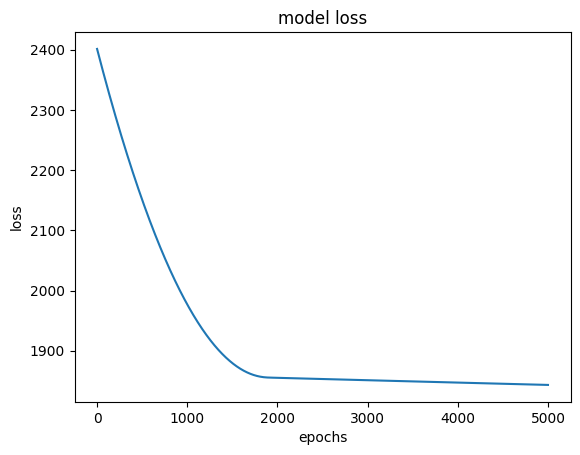

In [25]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

#### 4) 모델 예측
- 몸무게 100, 나이 40살인 사람의 blood fat

In [26]:
model.predict(np.array([100, 40]).reshape(1, 2))

1/1 [==============================] - 0s 54ms/step


array([[351.0743]], dtype=float32)

#### 5) 학습을 통해 결정된 모델의 가중치와 bias 

In [27]:
W_, b_ = model.get_weights()
print('weight: ', W_)
print('bias: ', b_)

weight:  [[1.1923492]
 [5.546987 ]]
bias:  [9.959895]


#### 6. 모델 linear regression 직선

In [28]:
x = np.linspace(20, 100, 50).reshape(50, 1)
y = np.linspace(10, 70, 50).reshape(50, 1)

X = np.concatenate((x,y), axis=1)
Z = np.matmul(X, W_) + b_

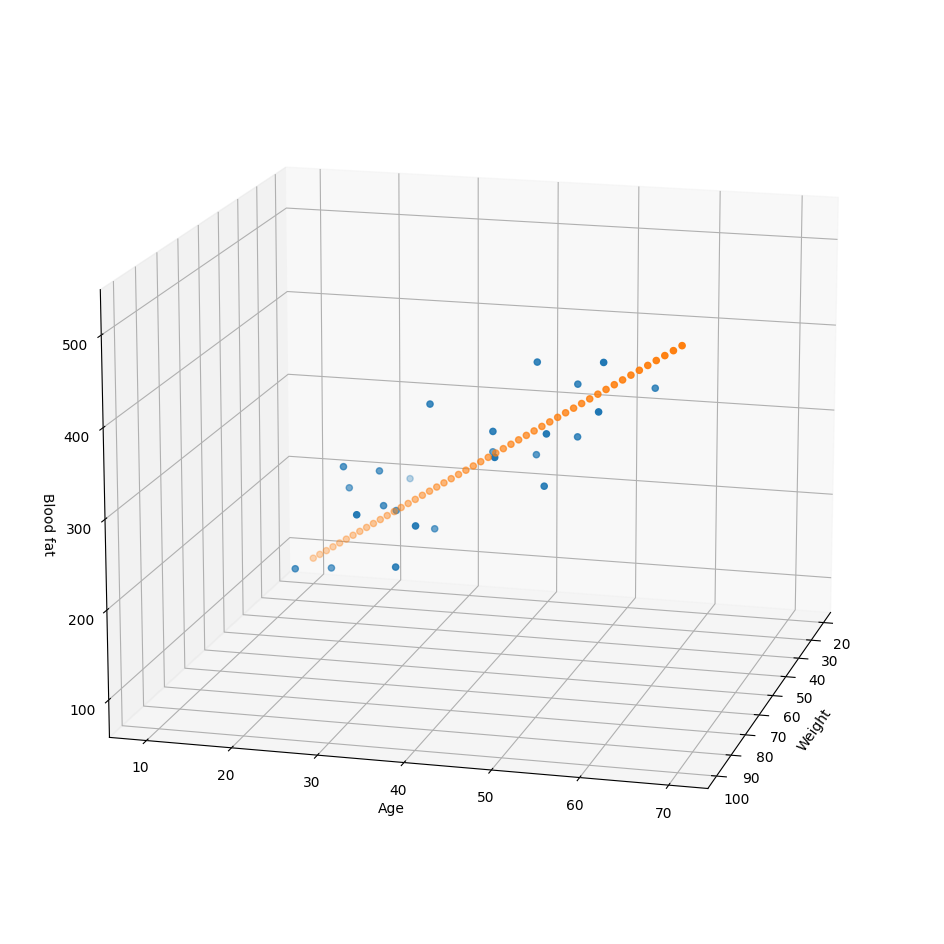

In [29]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z) # 직선

ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')

ax.view_init(15, 15)
plt.show()

----

# XOR 데이터

In [31]:
import  numpy as np

X = np.array([[0, 0],
             [1, 0],
             [0, 1],
             [1, 1]])

y = np.array([[0],[1],[1],[0]])

#### 1) 모델 선언

In [33]:
# 입력이 2개, 출력은 1개인 layer 2개

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [35]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

#### 2. 모델 학습
- epochs는 지정된 횟수만큼 학습을 하는 것
- batch_size는 한번의 학습에 사용될 데이터의 수를 지정

In [36]:
history = model.fit(X, y, epochs=5000, batch_size=1)

Epoch 1/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2624
Epoch 2/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2613
Epoch 3/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2604
Epoch 4/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2595
Epoch 5/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2586
Epoch 6/5000
4/4 [==============================] - 0s 927us/step - loss: 0.2580
Epoch 7/5000
4/4 [==============================] - 0s 906us/step - loss: 0.2573
Epoch 8/5000
4/4 [==============================] - 0s 876us/step - loss: 0.2568
Epoch 9/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2563
Epoch 10/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2558
Epoch 11/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2556
Epoch 12/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2553
Epoch 13/5000
4/4 [========================

Epoch 103/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2518
Epoch 104/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2518
Epoch 105/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2518
Epoch 106/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2518
Epoch 107/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2518
Epoch 108/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2518
Epoch 109/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2518
Epoch 110/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2517
Epoch 111/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2517
Epoch 112/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2517
Epoch 113/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2517
Epoch 114/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2516
Epoch 115/5000
4/4 [========

4/4 [==============================] - 0s 0s/step - loss: 0.2499
Epoch 205/5000
4/4 [==============================] - 0s 0s/step - loss: 0.2499
Epoch 206/5000
4/4 [==============================] - 0s 0s/step - loss: 0.2499
Epoch 207/5000
4/4 [==============================] - 0s 0s/step - loss: 0.2498
Epoch 208/5000
4/4 [==============================] - 0s 0s/step - loss: 0.2498
Epoch 209/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2498
Epoch 210/5000
4/4 [==============================] - 0s 86us/step - loss: 0.2497
Epoch 211/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2497
Epoch 212/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2496
Epoch 213/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2497
Epoch 214/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2496
Epoch 215/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2495
Epoch 216/5000
4/4 [===========================

4/4 [==============================] - 0s 522us/step - loss: 0.2467
Epoch 306/5000
4/4 [==============================] - 0s 531us/step - loss: 0.2465
Epoch 307/5000
4/4 [==============================] - 0s 922us/step - loss: 0.2466
Epoch 308/5000
4/4 [==============================] - 0s 441us/step - loss: 0.2465
Epoch 309/5000
4/4 [==============================] - 0s 766us/step - loss: 0.2465
Epoch 310/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2464
Epoch 311/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2464
Epoch 312/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2463
Epoch 313/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2463
Epoch 314/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2462
Epoch 315/5000
4/4 [==============================] - 0s 0s/step - loss: 0.2462
Epoch 316/5000
4/4 [==============================] - 0s 104us/step - loss: 0.2461
Epoch 317/5000
4/4 [============

4/4 [==============================] - 0s 2ms/step - loss: 0.2413
Epoch 406/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2412
Epoch 407/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2411
Epoch 408/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2410
Epoch 409/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2410
Epoch 410/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2409
Epoch 411/5000
4/4 [==============================] - 0s 0s/step - loss: 0.2408
Epoch 412/5000
4/4 [==============================] - 0s 81us/step - loss: 0.2408
Epoch 413/5000
4/4 [==============================] - 0s 444us/step - loss: 0.2407
Epoch 414/5000
4/4 [==============================] - 0s 452us/step - loss: 0.2406
Epoch 415/5000
4/4 [==============================] - 0s 823us/step - loss: 0.2406
Epoch 416/5000
4/4 [==============================] - 0s 800us/step - loss: 0.2404
Epoch 417/5000
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.2326
Epoch 506/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2326
Epoch 507/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2324
Epoch 508/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2323
Epoch 509/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2322
Epoch 510/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2321
Epoch 511/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2320
Epoch 512/5000
4/4 [==============================] - 0s 0s/step - loss: 0.2319
Epoch 513/5000
4/4 [==============================] - 0s 90us/step - loss: 0.2318
Epoch 514/5000
4/4 [==============================] - 0s 468us/step - loss: 0.2317
Epoch 515/5000
4/4 [==============================] - 0s 458us/step - loss: 0.2316
Epoch 516/5000
4/4 [==============================] - 0s 820us/step - loss: 0.2315
Epoch 517/5000
4/4 [=================

4/4 [==============================] - 0s 882us/step - loss: 0.2204
Epoch 606/5000
4/4 [==============================] - 0s 881us/step - loss: 0.2203
Epoch 607/5000
4/4 [==============================] - 0s 947us/step - loss: 0.2201
Epoch 608/5000
4/4 [==============================] - 0s 432us/step - loss: 0.2200
Epoch 609/5000
4/4 [==============================] - 0s 490us/step - loss: 0.2198
Epoch 610/5000
4/4 [==============================] - 0s 976us/step - loss: 0.2197
Epoch 611/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2196
Epoch 612/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2194
Epoch 613/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2193
Epoch 614/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2191
Epoch 615/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2190
Epoch 616/5000
4/4 [==============================] - 0s 0s/step - loss: 0.2189
Epoch 617/5000
4/4 [============

4/4 [==============================] - 0s 874us/step - loss: 0.2055
Epoch 706/5000
4/4 [==============================] - 0s 898us/step - loss: 0.2053
Epoch 707/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2052
Epoch 708/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2050
Epoch 709/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2049
Epoch 710/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2047
Epoch 711/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2045
Epoch 712/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2044
Epoch 713/5000
4/4 [==============================] - 0s 0s/step - loss: 0.2042
Epoch 714/5000
4/4 [==============================] - 0s 132us/step - loss: 0.2041
Epoch 715/5000
4/4 [==============================] - 0s 455us/step - loss: 0.2040
Epoch 716/5000
4/4 [==============================] - 0s 468us/step - loss: 0.2038
Epoch 717/5000
4/4 [==============

4/4 [==============================] - 0s 610us/step - loss: 0.1903
Epoch 806/5000
4/4 [==============================] - 0s 602us/step - loss: 0.1902
Epoch 807/5000
4/4 [==============================] - 0s 623us/step - loss: 0.1900
Epoch 808/5000
4/4 [==============================] - 0s 176us/step - loss: 0.1899
Epoch 809/5000
4/4 [==============================] - 0s 438us/step - loss: 0.1898
Epoch 810/5000
4/4 [==============================] - 0s 466us/step - loss: 0.1896
Epoch 811/5000
4/4 [==============================] - 0s 466us/step - loss: 0.1894
Epoch 812/5000
4/4 [==============================] - 0s 771us/step - loss: 0.1893
Epoch 813/5000
4/4 [==============================] - 0s 796us/step - loss: 0.1891
Epoch 814/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1890
Epoch 815/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1889
Epoch 816/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1888
Epoch 817/5000
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.1772
Epoch 906/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1771
Epoch 907/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1769
Epoch 908/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1768
Epoch 909/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1767
Epoch 910/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1766
Epoch 911/5000
4/4 [==============================] - 0s 443us/step - loss: 0.1765
Epoch 912/5000
4/4 [==============================] - 0s 433us/step - loss: 0.1764
Epoch 913/5000
4/4 [==============================] - 0s 349us/step - loss: 0.1763
Epoch 914/5000
4/4 [==============================] - 0s 825us/step - loss: 0.1762
Epoch 915/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1760
Epoch 916/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1759
Epoch 917/5000
4/4 [=================

4/4 [==============================] - 0s 1ms/step - loss: 0.1669
Epoch 1006/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1669
Epoch 1007/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1667
Epoch 1008/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1667
Epoch 1009/5000
4/4 [==============================] - 0s 139us/step - loss: 0.1666
Epoch 1010/5000
4/4 [==============================] - 0s 463us/step - loss: 0.1665
Epoch 1011/5000
4/4 [==============================] - 0s 491us/step - loss: 0.1664
Epoch 1012/5000
4/4 [==============================] - 0s 806us/step - loss: 0.1663
Epoch 1013/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1662
Epoch 1014/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1661
Epoch 1015/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1661
Epoch 1016/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1660
Epoch 1017/5000
4/4 [====

4/4 [==============================] - 0s 1ms/step - loss: 0.1593
Epoch 1105/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1593
Epoch 1106/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1592
Epoch 1107/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1591
Epoch 1108/5000
4/4 [==============================] - 0s 96us/step - loss: 0.1591
Epoch 1109/5000
4/4 [==============================] - 0s 477us/step - loss: 0.1590
Epoch 1110/5000
4/4 [==============================] - 0s 463us/step - loss: 0.1590
Epoch 1111/5000
4/4 [==============================] - 0s 492us/step - loss: 0.1589
Epoch 1112/5000
4/4 [==============================] - 0s 857us/step - loss: 0.1588
Epoch 1113/5000
4/4 [==============================] - 0s 804us/step - loss: 0.1588
Epoch 1114/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1587
Epoch 1115/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1586
Epoch 1116/5000
4/4 [=

4/4 [==============================] - 0s 1ms/step - loss: 0.1537
Epoch 1204/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1537
Epoch 1205/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1536
Epoch 1206/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1536
Epoch 1207/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1535
Epoch 1208/5000
4/4 [==============================] - 0s 99us/step - loss: 0.1535
Epoch 1209/5000
4/4 [==============================] - 0s 466us/step - loss: 0.1534
Epoch 1210/5000
4/4 [==============================] - 0s 472us/step - loss: 0.1534
Epoch 1211/5000
4/4 [==============================] - 0s 551us/step - loss: 0.1533
Epoch 1212/5000
4/4 [==============================] - 0s 805us/step - loss: 0.1533
Epoch 1213/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1532
Epoch 1214/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1532
Epoch 1215/5000
4/4 [===

4/4 [==============================] - 0s 997us/step - loss: 0.1495
Epoch 1303/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1494
Epoch 1304/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1494
Epoch 1305/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1493
Epoch 1306/5000
4/4 [==============================] - 0s 997us/step - loss: 0.1493
Epoch 1307/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1493
Epoch 1308/5000
4/4 [==============================] - 0s 987us/step - loss: 0.1492
Epoch 1309/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1492
Epoch 1310/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1492
Epoch 1311/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1491
Epoch 1312/5000
4/4 [==============================] - 0s 200us/step - loss: 0.1491
Epoch 1313/5000
4/4 [==============================] - 0s 488us/step - loss: 0.1490
Epoch 1314/5000
4/4 [==

4/4 [==============================] - 0s 2ms/step - loss: 0.1462
Epoch 1402/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1462
Epoch 1403/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1461
Epoch 1404/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1461
Epoch 1405/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1461
Epoch 1406/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1461
Epoch 1407/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1460
Epoch 1408/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1460
Epoch 1409/5000
4/4 [==============================] - 0s 149us/step - loss: 0.1460
Epoch 1410/5000
4/4 [==============================] - 0s 491us/step - loss: 0.1459
Epoch 1411/5000
4/4 [==============================] - 0s 578us/step - loss: 0.1459
Epoch 1412/5000
4/4 [==============================] - 0s 516us/step - loss: 0.1459
Epoch 1413/5000
4/4 [====

4/4 [==============================] - 0s 1ms/step - loss: 0.1437
Epoch 1501/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1437
Epoch 1502/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1436
Epoch 1503/5000
4/4 [==============================] - 0s 597us/step - loss: 0.1436
Epoch 1504/5000
4/4 [==============================] - 0s 577us/step - loss: 0.1436
Epoch 1505/5000
4/4 [==============================] - 0s 647us/step - loss: 0.1436
Epoch 1506/5000
4/4 [==============================] - 0s 246us/step - loss: 0.1435
Epoch 1507/5000
4/4 [==============================] - 0s 219us/step - loss: 0.1435
Epoch 1508/5000
4/4 [==============================] - 0s 248us/step - loss: 0.1435
Epoch 1509/5000
4/4 [==============================] - 0s 221us/step - loss: 0.1435
Epoch 1510/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1434
Epoch 1511/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1434
Epoch 1512/5000
4/

4/4 [==============================] - 0s 0s/step - loss: 0.1417
Epoch 1600/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1416
Epoch 1601/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1416
Epoch 1602/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1416
Epoch 1603/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1416
Epoch 1604/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1416
Epoch 1605/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1415
Epoch 1606/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1415
Epoch 1607/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1415
Epoch 1608/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1415
Epoch 1609/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1415
Epoch 1610/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1415
Epoch 1611/5000
4/4 [=======================

4/4 [==============================] - 0s 0s/step - loss: 0.1400
Epoch 1700/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1400
Epoch 1701/5000
4/4 [==============================] - 0s 83us/step - loss: 0.1400
Epoch 1702/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1400
Epoch 1703/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1399
Epoch 1704/5000
4/4 [==============================] - 0s 170us/step - loss: 0.1399
Epoch 1705/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1399
Epoch 1706/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1399
Epoch 1707/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1399
Epoch 1708/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1399
Epoch 1709/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1399
Epoch 1710/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1398
Epoch 1711/5000
4/4 [============

4/4 [==============================] - 0s 1ms/step - loss: 0.1387
Epoch 1800/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1386
Epoch 1801/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1386
Epoch 1802/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1386
Epoch 1803/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1386
Epoch 1804/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1386
Epoch 1805/5000
4/4 [==============================] - 0s 193us/step - loss: 0.1386
Epoch 1806/5000
4/4 [==============================] - 0s 542us/step - loss: 0.1386
Epoch 1807/5000
4/4 [==============================] - 0s 575us/step - loss: 0.1386
Epoch 1808/5000
4/4 [==============================] - 0s 937us/step - loss: 0.1385
Epoch 1809/5000
4/4 [==============================] - 0s 904us/step - loss: 0.1385
Epoch 1810/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1385
Epoch 1811/5000
4/4 [==

4/4 [==============================] - 0s 1ms/step - loss: 0.1375
Epoch 1899/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1375
Epoch 1900/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1375
Epoch 1901/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1375
Epoch 1902/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1375
Epoch 1903/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1375
Epoch 1904/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1375
Epoch 1905/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1375
Epoch 1906/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1375
Epoch 1907/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1375
Epoch 1908/5000
4/4 [==============================] - 0s 233us/step - loss: 0.1374
Epoch 1909/5000
4/4 [==============================] - 0s 230us/step - loss: 0.1374
Epoch 1910/5000
4/4 [========

4/4 [==============================] - 0s 1ms/step - loss: 0.1366
Epoch 1998/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1366
Epoch 1999/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1366
Epoch 2000/5000
4/4 [==============================] - 0s 877us/step - loss: 0.1366
Epoch 2001/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1366
Epoch 2002/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1366
Epoch 2003/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1365
Epoch 2004/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1365
Epoch 2005/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1365
Epoch 2006/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1365
Epoch 2007/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1365
Epoch 2008/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1365
Epoch 2009/5000
4/4 [==========

4/4 [==============================] - 0s 1ms/step - loss: 0.1358
Epoch 2097/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1358
Epoch 2098/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1358
Epoch 2099/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1358
Epoch 2100/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1358
Epoch 2101/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1358
Epoch 2102/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1358
Epoch 2103/5000
4/4 [==============================] - 0s 963us/step - loss: 0.1357
Epoch 2104/5000
4/4 [==============================] - 0s 947us/step - loss: 0.1357
Epoch 2105/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1357
Epoch 2106/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1357
Epoch 2107/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1357
Epoch 2108/5000
4/4 [=======

Epoch 2196/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1351
Epoch 2197/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1351
Epoch 2198/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1351
Epoch 2199/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1351
Epoch 2200/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1351
Epoch 2201/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1351
Epoch 2202/5000
4/4 [==============================] - 0s 81us/step - loss: 0.1351
Epoch 2203/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1350
Epoch 2204/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1350
Epoch 2205/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1350
Epoch 2206/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1350
Epoch 2207/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1350
Epoch 2208/5000
4/4 [

4/4 [==============================] - 0s 2ms/step - loss: 0.1345
Epoch 2297/5000
4/4 [==============================] - 0s 667us/step - loss: 0.1345
Epoch 2298/5000
4/4 [==============================] - 0s 572us/step - loss: 0.1345
Epoch 2299/5000
4/4 [==============================] - 0s 205us/step - loss: 0.1345
Epoch 2300/5000
4/4 [==============================] - 0s 558us/step - loss: 0.1345
Epoch 2301/5000
4/4 [==============================] - 0s 918us/step - loss: 0.1345
Epoch 2302/5000
4/4 [==============================] - 0s 920us/step - loss: 0.1345
Epoch 2303/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1344
Epoch 2304/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1344
Epoch 2305/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1344
Epoch 2306/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1344
Epoch 2307/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1344
Epoch 2308/5000
4/4 

4/4 [==============================] - 0s 1ms/step - loss: 0.1340
Epoch 2396/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1340
Epoch 2397/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1339
Epoch 2398/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1339
Epoch 2399/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1339
Epoch 2400/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1339
Epoch 2401/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1339
Epoch 2402/5000
4/4 [==============================] - 0s 271us/step - loss: 0.1339
Epoch 2403/5000
4/4 [==============================] - 0s 254us/step - loss: 0.1339
Epoch 2404/5000
4/4 [==============================] - 0s 251us/step - loss: 0.1339
Epoch 2405/5000
4/4 [==============================] - 0s 643us/step - loss: 0.1339
Epoch 2406/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1339
Epoch 2407/5000
4/4 [===

4/4 [==============================] - 0s 1ms/step - loss: 0.1335
Epoch 2495/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1335
Epoch 2496/5000
4/4 [==============================] - 0s 997us/step - loss: 0.1335
Epoch 2497/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1335
Epoch 2498/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1335
Epoch 2499/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1335
Epoch 2500/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1335
Epoch 2501/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1335
Epoch 2502/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1335
Epoch 2503/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1335
Epoch 2504/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1335
Epoch 2505/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1334
Epoch 2506/5000
4/4 [=========

4/4 [==============================] - 0s 1ms/step - loss: 0.1331
Epoch 2594/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1331
Epoch 2595/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1331
Epoch 2596/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1331
Epoch 2597/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1331
Epoch 2598/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1331
Epoch 2599/5000
4/4 [==============================] - 0s 260us/step - loss: 0.1331
Epoch 2600/5000
4/4 [==============================] - 0s 201us/step - loss: 0.1331
Epoch 2601/5000
4/4 [==============================] - 0s 641us/step - loss: 0.1330
Epoch 2602/5000
4/4 [==============================] - 0s 580us/step - loss: 0.1330
Epoch 2603/5000
4/4 [==============================] - 0s 597us/step - loss: 0.1330
Epoch 2604/5000
4/4 [==============================] - 0s 997us/step - loss: 0.1330
Epoch 2605/5000
4/4 [

4/4 [==============================] - 0s 1ms/step - loss: 0.1327
Epoch 2693/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1327
Epoch 2694/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1327
Epoch 2695/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1327
Epoch 2696/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1327
Epoch 2697/5000
4/4 [==============================] - 0s 268us/step - loss: 0.1327
Epoch 2698/5000
4/4 [==============================] - 0s 342us/step - loss: 0.1327
Epoch 2699/5000
4/4 [==============================] - 0s 272us/step - loss: 0.1327
Epoch 2700/5000
4/4 [==============================] - 0s 278us/step - loss: 0.1327
Epoch 2701/5000
4/4 [==============================] - 0s 299us/step - loss: 0.1327
Epoch 2702/5000
4/4 [==============================] - 0s 287us/step - loss: 0.1327
Epoch 2703/5000
4/4 [==============================] - 0s 667us/step - loss: 0.1327
Epoch 2704/5000
4/

4/4 [==============================] - 0s 2ms/step - loss: 0.1324
Epoch 2792/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1324
Epoch 2793/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1324
Epoch 2794/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1324
Epoch 2795/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1324
Epoch 2796/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1324
Epoch 2797/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1324
Epoch 2798/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1324
Epoch 2799/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1324
Epoch 2800/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1324
Epoch 2801/5000
4/4 [==============================] - 0s 997us/step - loss: 0.1323
Epoch 2802/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1323
Epoch 2803/5000
4/4 [============

4/4 [==============================] - 0s 2ms/step - loss: 0.1321
Epoch 2892/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1321
Epoch 2893/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1321
Epoch 2894/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1321
Epoch 2895/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1321
Epoch 2896/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1321
Epoch 2897/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1321
Epoch 2898/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1321
Epoch 2899/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1321
Epoch 2900/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1320
Epoch 2901/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1320
Epoch 2902/5000
4/4 [==============================] - 0s 674us/step - loss: 0.1320
Epoch 2903/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.1318
Epoch 2991/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1318
Epoch 2992/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1318
Epoch 2993/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1318
Epoch 2994/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1318
Epoch 2995/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1318
Epoch 2996/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1318
Epoch 2997/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1318
Epoch 2998/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1318
Epoch 2999/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1318
Epoch 3000/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1318
Epoch 3001/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1318
Epoch 3002/5000
4/4 [============

4/4 [==============================] - 0s 1ms/step - loss: 0.1316
Epoch 3090/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1316
Epoch 3091/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1316
Epoch 3092/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1315
Epoch 3093/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1315
Epoch 3094/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1315
Epoch 3095/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1315
Epoch 3096/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1315
Epoch 3097/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1315
Epoch 3098/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1315
Epoch 3099/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1315
Epoch 3100/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1315
Epoch 3101/5000
4/4 [===========

4/4 [==============================] - 0s 0s/step - loss: 0.1313
Epoch 3190/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1313
Epoch 3191/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1313
Epoch 3192/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1313
Epoch 3193/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1313
Epoch 3194/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1313
Epoch 3195/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1313
Epoch 3196/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1313
Epoch 3197/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1313
Epoch 3198/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1313
Epoch 3199/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1313
Epoch 3200/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1313
Epoch 3201/5000
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 0.1311
Epoch 3290/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1311
Epoch 3291/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1311
Epoch 3292/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1311
Epoch 3293/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1311
Epoch 3294/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1311
Epoch 3295/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1311
Epoch 3296/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1311
Epoch 3297/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1311
Epoch 3298/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1311
Epoch 3299/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1311
Epoch 3300/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1311
Epoch 3301/5000
4/4 [=====================

4/4 [==============================] - 0s 1ms/step - loss: 0.1309
Epoch 3390/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1309
Epoch 3391/5000
4/4 [==============================] - 0s 936us/step - loss: 0.1309
Epoch 3392/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1309
Epoch 3393/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1309
Epoch 3394/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1309
Epoch 3395/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1309
Epoch 3396/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1309
Epoch 3397/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1309
Epoch 3398/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1309
Epoch 3399/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1309
Epoch 3400/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1309
Epoch 3401/5000
4/4 [=========

4/4 [==============================] - 0s 1ms/step - loss: 0.1307
Epoch 3489/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1307
Epoch 3490/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1307
Epoch 3491/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1307
Epoch 3492/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1307
Epoch 3493/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1307
Epoch 3494/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1307
Epoch 3495/5000
4/4 [==============================] - 0s 314us/step - loss: 0.1307
Epoch 3496/5000
4/4 [==============================] - 0s 391us/step - loss: 0.1307
Epoch 3497/5000
4/4 [==============================] - 0s 333us/step - loss: 0.1307
Epoch 3498/5000
4/4 [==============================] - 0s 692us/step - loss: 0.1307
Epoch 3499/5000
4/4 [==============================] - 0s 363us/step - loss: 0.1307
Epoch 3500/5000
4/4 [=

4/4 [==============================] - 0s 1ms/step - loss: 0.1306
Epoch 3588/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1306
Epoch 3589/5000
4/4 [==============================] - 0s 998us/step - loss: 0.1306
Epoch 3590/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1306
Epoch 3591/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1306
Epoch 3592/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1306
Epoch 3593/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1306
Epoch 3594/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1306
Epoch 3595/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1306
Epoch 3596/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1306
Epoch 3597/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1306
Epoch 3598/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1306
Epoch 3599/5000
4/4 [=========

4/4 [==============================] - 0s 2ms/step - loss: 0.1304
Epoch 3687/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1304
Epoch 3688/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1304
Epoch 3689/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1304
Epoch 3690/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1304
Epoch 3691/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1304
Epoch 3692/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1304
Epoch 3693/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1304
Epoch 3694/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1304
Epoch 3695/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1304
Epoch 3696/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1304
Epoch 3697/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1304
Epoch 3698/5000
4/4 [=====================

4/4 [==============================] - 0s 2ms/step - loss: 0.1303
Epoch 3787/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1303
Epoch 3788/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1303
Epoch 3789/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1303
Epoch 3790/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1303
Epoch 3791/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1303
Epoch 3792/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1303
Epoch 3793/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1303
Epoch 3794/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1303
Epoch 3795/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1303
Epoch 3796/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1303
Epoch 3797/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1303
Epoch 3798/5000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.1302
Epoch 3886/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1302
Epoch 3887/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1302
Epoch 3888/5000
4/4 [==============================] - 0s 781us/step - loss: 0.1302
Epoch 3889/5000
4/4 [==============================] - 0s 120us/step - loss: 0.1302
Epoch 3890/5000
4/4 [==============================] - 0s 448us/step - loss: 0.1302
Epoch 3891/5000
4/4 [==============================] - 0s 431us/step - loss: 0.1302
Epoch 3892/5000
4/4 [==============================] - 0s 86us/step - loss: 0.1302
Epoch 3893/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1302
Epoch 3894/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1302
Epoch 3895/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1301
Epoch 3896/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1301
Epoch 3897/5000
4/4 [==

4/4 [==============================] - 0s 1ms/step - loss: 0.1300
Epoch 3985/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1300
Epoch 3986/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1300
Epoch 3987/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1300
Epoch 3988/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1300
Epoch 3989/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1300
Epoch 3990/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1300
Epoch 3991/5000
4/4 [==============================] - 0s 361us/step - loss: 0.1300
Epoch 3992/5000
4/4 [==============================] - 0s 960us/step - loss: 0.1300
Epoch 3993/5000
4/4 [==============================] - 0s 396us/step - loss: 0.1300
Epoch 3994/5000
4/4 [==============================] - 0s 456us/step - loss: 0.1300
Epoch 3995/5000
4/4 [==============================] - 0s 409us/step - loss: 0.1300
Epoch 3996/5000
4/4 [=

4/4 [==============================] - 0s 1ms/step - loss: 0.1299
Epoch 4084/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1299
Epoch 4085/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1299
Epoch 4086/5000
4/4 [==============================] - 0s 353us/step - loss: 0.1299
Epoch 4087/5000
4/4 [==============================] - 0s 388us/step - loss: 0.1299
Epoch 4088/5000
4/4 [==============================] - 0s 376us/step - loss: 0.1299
Epoch 4089/5000
4/4 [==============================] - 0s 392us/step - loss: 0.1299
Epoch 4090/5000
4/4 [==============================] - 0s 421us/step - loss: 0.1299
Epoch 4091/5000
4/4 [==============================] - 0s 714us/step - loss: 0.1299
Epoch 4092/5000
4/4 [==============================] - 0s 759us/step - loss: 0.1299
Epoch 4093/5000
4/4 [==============================] - 0s 758us/step - loss: 0.1299
Epoch 4094/5000
4/4 [==============================] - 0s 814us/step - loss: 0.1299
Epoch 4095/500

4/4 [==============================] - 0s 2ms/step - loss: 0.1298
Epoch 4183/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1298
Epoch 4184/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1298
Epoch 4185/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1298
Epoch 4186/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1298
Epoch 4187/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1298
Epoch 4188/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1298
Epoch 4189/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1298
Epoch 4190/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1298
Epoch 4191/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1298
Epoch 4192/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1298
Epoch 4193/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1298
Epoch 4194/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.1297
Epoch 4282/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1297
Epoch 4283/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1297
Epoch 4284/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1297
Epoch 4285/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1297
Epoch 4286/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1297
Epoch 4287/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1297
Epoch 4288/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1297
Epoch 4289/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1297
Epoch 4290/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1297
Epoch 4291/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1297
Epoch 4292/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1297
Epoch 4293/5000
4/4 [===========

4/4 [==============================] - 0s 824us/step - loss: 0.1296
Epoch 4381/5000
4/4 [==============================] - 0s 874us/step - loss: 0.1296
Epoch 4382/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1296
Epoch 4383/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1296
Epoch 4384/5000
4/4 [==============================] - 0s 861us/step - loss: 0.1296
Epoch 4385/5000
4/4 [==============================] - 0s 654us/step - loss: 0.1296
Epoch 4386/5000
4/4 [==============================] - 0s 688us/step - loss: 0.1296
Epoch 4387/5000
4/4 [==============================] - 0s 683us/step - loss: 0.1296
Epoch 4388/5000
4/4 [==============================] - 0s 785us/step - loss: 0.1296
Epoch 4389/5000
4/4 [==============================] - 0s 676us/step - loss: 0.1296
Epoch 4390/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1296
Epoch 4391/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1296
Epoch 4392/5000


4/4 [==============================] - 0s 0s/step - loss: 0.1295
Epoch 4481/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.1295
Epoch 4482/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1295
Epoch 4483/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1295
Epoch 4484/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1295
Epoch 4485/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1295
Epoch 4486/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1295
Epoch 4487/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1295
Epoch 4488/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1295
Epoch 4489/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1295
Epoch 4490/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1295
Epoch 4491/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1295
Epoch 4492/5000
4/4 [==============

4/4 [==============================] - 0s 2ms/step - loss: 0.1294
Epoch 4581/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1294
Epoch 4582/5000
4/4 [==============================] - 0s 877us/step - loss: 0.1294
Epoch 4583/5000
4/4 [==============================] - 0s 898us/step - loss: 0.1294
Epoch 4584/5000
4/4 [==============================] - 0s 534us/step - loss: 0.1294
Epoch 4585/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1294
Epoch 4586/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1294
Epoch 4587/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1294
Epoch 4588/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1294
Epoch 4589/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1294
Epoch 4590/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1294
Epoch 4591/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1294
Epoch 4592/5000
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.1294
Epoch 4680/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1294
Epoch 4681/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1294
Epoch 4682/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1294
Epoch 4683/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1294
Epoch 4684/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1294
Epoch 4685/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1294
Epoch 4686/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1294
Epoch 4687/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1294
Epoch 4688/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1294
Epoch 4689/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1294
Epoch 4690/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1294
Epoch 4691/5000
4/4 [===========

4/4 [==============================] - 0s 0s/step - loss: 0.1293
Epoch 4780/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1293
Epoch 4781/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1293
Epoch 4782/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1293
Epoch 4783/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1293
Epoch 4784/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1293
Epoch 4785/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1293
Epoch 4786/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1293
Epoch 4787/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1293
Epoch 4788/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1293
Epoch 4789/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1293
Epoch 4790/5000
4/4 [==============================] - 0s 0s/step - loss: 0.1293
Epoch 4791/5000
4/4 [======================

4/4 [==============================] - 0s 997us/step - loss: 0.1292
Epoch 4880/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1292
Epoch 4881/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1292
Epoch 4882/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1292
Epoch 4883/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1292
Epoch 4884/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1292
Epoch 4885/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1292
Epoch 4886/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1292
Epoch 4887/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1292
Epoch 4888/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1292
Epoch 4889/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1292
Epoch 4890/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1292
Epoch 4891/5000
4/4 [=========

4/4 [==============================] - 0s 1ms/step - loss: 0.1291
Epoch 4979/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1291
Epoch 4980/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1291
Epoch 4981/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1291
Epoch 4982/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1291
Epoch 4983/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1291
Epoch 4984/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1291
Epoch 4985/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1291
Epoch 4986/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1291
Epoch 4987/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1291
Epoch 4988/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1291
Epoch 4989/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1291
Epoch 4990/5000
4/4 [===========

#### 3. 학습 결과

In [37]:
model.predict(X)

1/1 [==============================] - 0s 43ms/step


array([[0.04400556],
       [0.49723938],
       [0.95462435],
       [0.5033606 ]], dtype=float32)

#### 4. 모델 예측 loss

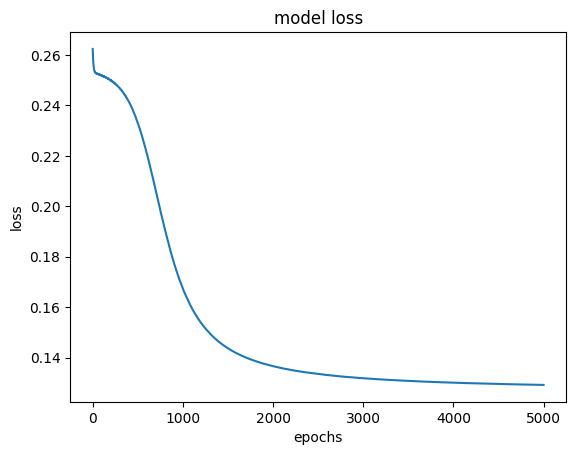

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

#### 5) 학습을 통해 결정된 모델의 가중치와 bias

In [39]:
for w in model.weights:
    print('===')
    print(w)

===
<tf.Variable 'dense_2/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-6.7364907, -6.7218356],
       [-3.7491987,  3.1650002]], dtype=float32)>
===
<tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32, numpy=array([ 0.70879924, -2.3563137 ], dtype=float32)>
===
<tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-5.208158],
       [ 4.745486]], dtype=float32)>
===
<tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([0.00094284], dtype=float32)>


---

# Iris 데이터

In [40]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [48]:
X.shape

(150, 4)

In [49]:
y.shape

(150,)

In [41]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### y 데이터를 ont-hot encoding 수행

In [42]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(y.reshape(len(y), 1))

C:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [43]:
enc.categories_

[array([0, 1, 2])]

In [44]:
y_onehot = enc.transform(y.reshape(len(y), 1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=13)

#### 1. 모델 선언
- input 4 / output 3인 layer 3개짜리 neural network

In [50]:
X.shape, y_onehot.shape

((150, 4), (150, 3))

![nn](img/nn.png)

### softmax란?
 neural network의 결과를 받아들이는 세가지 방법은
 1. value 값 직접 받기. 
2. value 값을 sigmoid 함수 통과시켜 binary 분류로 받기.
3. value 값을 softmax 함수 통과시켜 catecory 분류로 받기.

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

### adam이라는 optimizer 란?
- loss가 가장 적은 weight를 찾는 과정에서 성능이 좋은 optimizer
- 데이터가 복잡할 땐 이걸 쓰는게 좋음
![nn](img/optimizer.png)

In [54]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                160       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2371 (9.26 KB)
Trainable params: 2371 (9.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 2. 모델 학습

In [55]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0773 - accuracy: 0.3083
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0184 - accuracy: 0.3250
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9616 - accuracy: 0.3250
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9215 - accuracy: 0.3917
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8783 - accuracy: 0.6500
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8276 - accuracy: 0.6583
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7795 - accuracy: 0.6583
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7362 - accuracy: 0.6750
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.8250
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.9500
Epoch 11/100
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0.9750
Epoch 85/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9750
Epoch 86/100
4/4 [==============================] - 0s 0s/step - loss: 0.0680 - accuracy: 0.9833
Epoch 87/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9667
Epoch 88/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0718 - accuracy: 0.9667
Epoch 89/100
4/4 [==============================] - 0s 0s/step - loss: 0.0682 - accuracy: 0.9833
Epoch 90/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9750
Epoch 91/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0.9750
Epoch 92/100
4/4 [==============================] - 0s 0s/step - loss: 0.0680 - accuracy: 0.9750
Epoch 93/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0664 - accuracy: 0.9833
Epoch 94/100
4/4 [==================

#### 3. test 데이터 이용한 학습결과
- accuracy: 0.9667

In [60]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0988 - accuracy: 0.9667 - 100ms/epoch - 100ms/step


[0.09878083318471909, 0.9666666388511658]

#### 4. 모델 예측 loss

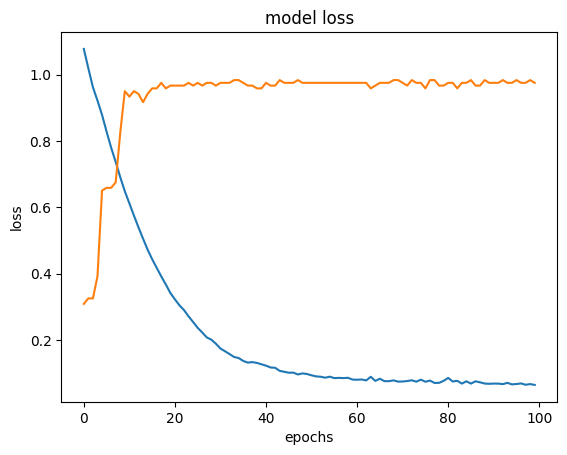

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss']) # 파란색 선
plt.plot(history.history['accuracy']) # 주황색 선

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()